In [1]:
#Solo correr en Deepnote
# import os
# g = os.getcwd()
# g
# path = r'/work/online_retail_analysis'
# os.chdir(path)
# !pip install --editable .
# !pip install pyprojroot
# !pip install openpyxl

In [16]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import online_retail_analysis.utils.paths as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

### Import data

In [18]:
df = pd.read_excel(path.data_raw_dir('Online Retail.xlsx'))
#encoding = 'unicode_escape', engine ='python'
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
398679,571257,84923,PINK BUTTERFLY HANDBAG W BOBBLES,4,2011-10-14 17:17:00,4.130,NaN,United Kingdom
78779,542898,37446,MINI CAKE STAND WITH HANGING CAKES,1,2011-02-01 14:01:00,1.450,"16,110.000",United Kingdom
225288,C556647,22502,PICNIC BASKET WICKER SMALL,-4,2011-06-13 16:14:00,5.950,"13,012.000",United Kingdom
76084,542619,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2011-01-30 15:54:00,2.550,"13,869.000",United Kingdom
522506,580399,22625,RED KITCHEN SCALES,1,2011-12-04 11:45:00,8.500,"13,471.000",United Kingdom


### Check data

In [19]:
df.info()#see the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [20]:
df_proces = df.copy() # create a copy the data
df_proces.isna().sum() # see the number of row whit NaN

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
df_proces[df_proces.isnull().any(axis=1)] # see the null data by columns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.000,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.510,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.510,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.850,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.660,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.130,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.130,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.960,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.790,NaN,United Kingdom


In [22]:
df_proces.isnull().any(axis=0) # see null data from rows

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [23]:
df_proces.isnull().sum() # see all null data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [24]:
df_proces = df_proces[pd.notnull(df_proces['CustomerID'])] # delete null data from Customer ID

In [25]:
df_proces.InvoiceNo.value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: InvoiceNo, Length: 22190, dtype: int64

In [26]:
df_proces.duplicated().sum() #see the number of row duplicated

5225

In [27]:
df_proces.drop_duplicates(inplace=True) # remove the duplicated

df_proces.describe() # look the a little statistics 


,Quantity,UnitPrice,CustomerID
count,"401,604.000","401,604.000","401,604.000"
mean,12.183,3.474,"15,281.161"
std,250.283,69.764,"1,714.006"
min,"-80,995.000",0.000,"12,346.000"
25%,2.000,1.250,"13,939.000"
50%,5.000,1.950,"15,145.000"
75%,12.000,3.750,"16,784.000"
max,"80,995.000","38,970.000","18,287.000"


In [28]:
# delete Cancel transaccion 
df_proces['InvoiceNo'] = df_proces['InvoiceNo'].astype('str')
df_proces = df_proces[~df_proces['InvoiceNo'].str.contains('C')]

In [29]:
# delete Price and Quantity less than 0
df_proces = df_proces[df_proces.Quantity > 0]
df_proces = df_proces[df_proces.UnitPrice > 0]

In [30]:
print('Number of customers: {}'.format(len(df_proces.CustomerID.unique())))

print('Number of customers: {}'.format(len(df_proces.Country.unique())))

# df_proces.Country.value_counts()


Number of customers: 4338
Number of customers: 37


In [31]:
df_proces['date']= pd.to_datetime(df_proces['InvoiceDate'])
df_proces['month'] = df_proces['date'].dt.month
df_proces['days'] = df_proces['date'].dt.day_name()
df_proces

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.850,"12,680.000",France,2011-12-09 12:50:00,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.100,"12,680.000",France,2011-12-09 12:50:00,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.150,"12,680.000",France,2011-12-09 12:50:00,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.150,"12,680.000",France,2011-12-09 12:50:00,12,Friday


### Remove outliers from price and quantity

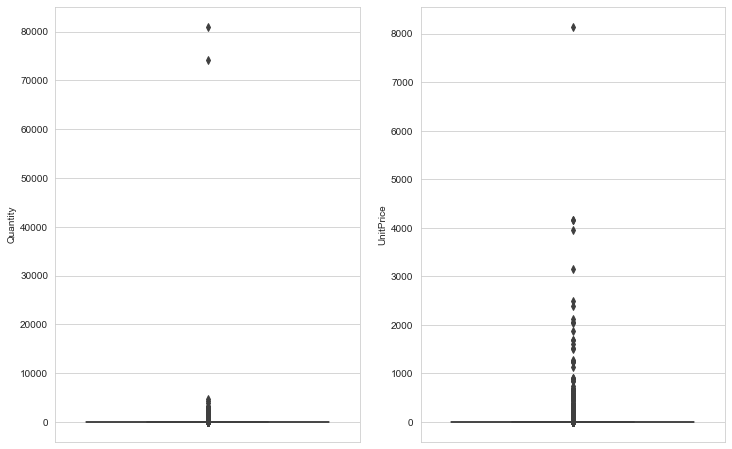

In [32]:
fig, axes= plt.subplots(1,2,figsize=(12,8))
sns.boxplot(y='Quantity', data=df_proces, ax=axes[0])
sns.boxplot(y='UnitPrice', data=df_proces, ax=axes[1])
plt.show()

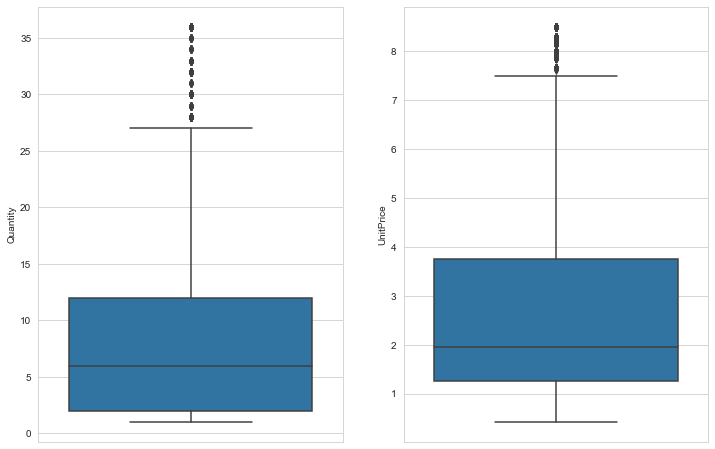

In [33]:
for col in ['Quantity','UnitPrice']:
    p_05 = df_proces[col].quantile(0.05) # 5th quantile
    p_95 = df_proces[col].quantile(0.95) # 95th quantile
    df_proces[col].clip(p_05, p_95, inplace=True)
fig, axes= plt.subplots(1,2,figsize=(12,8))
sns.boxplot(y='Quantity', data=df_proces, ax=axes[0])
sns.boxplot(y='UnitPrice', data=df_proces, ax=axes[1])
plt.show()

### Export Data Clean

In [ ]:
df_proces.to_csv(path.data_processed_dir('data_clean.csv'),index=False)


But how had the year? 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ad5389b-d0fe-4f26-b030-dadc57d353b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>